# Linear regression


The goal of this notebook is get you familiar with the ideas behind linear regression and how to implement this method in python. 

### What is linear regression?

How well can you fit a line to data points by eye? https://fditraglia.shinyapps.io/regression/

When we have a point cloud, or here measurements of two variables, we might notice the variables seem to lie near a line. Linear regression helps us find the line that describes our points the 'best'.

Today we'll use [statsmodels](https://www.statsmodels.org/stable/index.html) to perform our linear regression. Another popular packages is [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html), which we'll use in part 2.

Thanks to Sara Casella for providing the data and much of the code for this tutorial :)


In [22]:
# Import packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std


## Data

Let's look at the presumed relationship between SAT scores and college gpa. Does scoring higher on the SAT really suggest the student will perform better in college? If I worked to gain 10 more points on the SAT, how much should I expect my college GPA to increase?

We'll read in a large data frame, but we will begin with focusing on the following variables:
 
**colgpa**:   College GPA on a four point scale

**sat**:      Combined SAT score (verbal plus math)

In [23]:
# Import data

collegeDataAll = pd.read_csv('data/college_gpa.csv')
collegeData = collegeDataAll[['sat','colgpa']]
collegeData.head()

# collegeData.describe()

,sat,colgpa
0,920,2.04
1,1170,4.00
2,810,1.78
3,940,2.42
4,1180,2.61


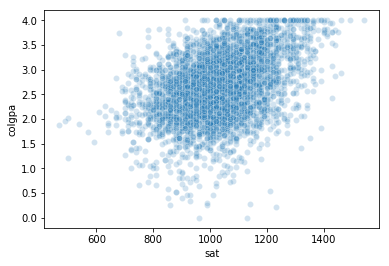

In [24]:
# Plot

# We could also make numpy arrays from our pandas dataframe so that our plotting would look just like last week.
# When using a pandas dataframe with seaborn, we input the whole dataframe and then assign the x and y variables
# using the column names.
sns.scatterplot(data = collegeData, x='sat', y='colgpa', alpha = 0.2)  # Why is the alpha = 0.2 helpful? 

Yikes, looks like a big blob. Though perhaps there is some relationship between SAT score and gpa...

## Performing linear regression.

Let's hypothesize that our data should lie along a line. 

Recall the equation of a line is
\begin{equation}
y = a + bx
\end{equation}

where $a$ is the y-intercept and $b$ is the slope of the line.

Let's replace x and y with our variables. This is the line we are trying to find.

\begin{equation}
\text{college GPA} = a + b \text{SAT score}
\end{equation}

As we saw before, we could choose many values for $a$ or $b$ that result in a decent-fitting line. But which one is the _best_ fitting line? We say the line of best fit is the line that minimimzes the sum of squared vertical deviations, also called the sum of squared residuals.

In [25]:
# Perform linear regression usings statsmodels

# The formula argument tells statsmodels what we think the linear relationship is. If we write down our equtaion (above)
# as y = a + bx, then we enter y ~ x into the function. The function will add the y-intercept term, a, and a coefficient,
# b, to any term on the right hand side.
model = smf.ols(formula = 'colgpa ~ sat', data = collegeData)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 colgpa   R-squared:                       0.167
Model:                            OLS   Adj. R-squared:                  0.167
Method:                 Least Squares   F-statistic:                     829.3
Date:                Thu, 16 Jul 2020   Prob (F-statistic):          2.32e-166
Time:                        18:30:02   Log-Likelihood:                -3764.0
No. Observations:                4137   AIC:                             7532.
Df Residuals:                    4135   BIC:                             7545.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6631      0.070      9.510      0.0

That table can be overwhelming. Let's extract just what we need.


In [5]:
# Extract results

print('a=', results.params[0])
print('b=', results.params[1])

a= 0.6630567662716945
b= 0.0019310575413994298


### YAY we did our first linear regression!

Pretty simple huh? Let's discuss what we found so far.

1. The slope $b$ is positive, which supports the idea that higher SAT scores correspond to higher GPAs.
2. 100 points more in the SAT are associated to $100*0.0019 = 0.19$ points more in the college GPA.

How good was our estimate of these parameters?

## Uncertainty

Just like when we estimated the mean of a population from a sample, above we have a sample and we are estimating the slope $b$ of the _real_ regression line (more on this later). With any estimate from a sample, we expect some error. Just like with the sample mean, we can calculate the _standard error of the slope_ which quantifies the uncertainty in our estimate. Low standard error indicates a more certain estimate. 

Similarly, we can also calcuate confidence intervals for our estimates of slope and y-intercept.



In [6]:
# Extract results
print("Standard error of b=", results.bse[0])
print("Confidence interval for b=[0.002, 0.002]")
print("Confidence interval for a=[0.526, 0.800]")

Standard error of b= 0.0697212675974015
Confidence interval for b=[0.002, 0.002]
Confidence interval for a=[0.526, 0.800]


## Predictions

Now that we have this linear description of the relationship, we can use the slope and intercept estimates to make predictions for _new_ data. 

**Prediction**: if your SAT score was 1300, your college GPA will be around to $0.663 + 0.0019*1300 = 3.13$ 

Predicted values:  [2.4396297  2.92239409 2.22721337 ... 3.25067387 2.55549316 3.40515848]


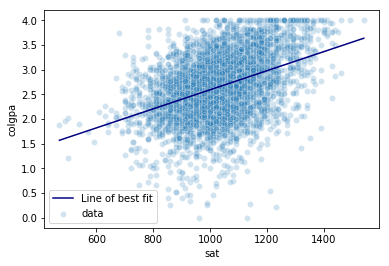

In [7]:
print('Predicted values: ', results.predict())

sns.scatterplot(data = collegeData, x='sat', y='colgpa', alpha = 0.2, label = "data")
sns.lineplot(collegeData["sat"], results.predict(), color="navy", label = "Line of best fit")

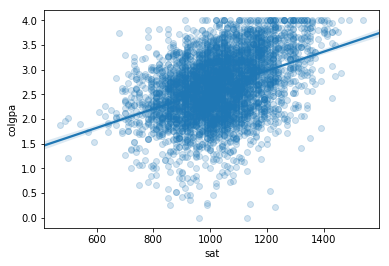

In [8]:
# To simplify our plotting, we can also use seaborn regplot

sns.regplot(data = collegeData, x='sat', y='colgpa', scatter_kws={'alpha':0.2})

## Multivariate linear regression

Let's do another linear regression, with two variables now. Let's add high school performance to the list of variables that might predict college GPA.
 
The variables we are interested in now are:
 
**colgpa**:   College GPA on a four point scale

**sat**:      Combined SAT score (verbal plus math)

**hsperc**   Percentile in HS graduating class (hsperc = 5 top 5%)

and our statistical model is 

\begin{equation}
\text{college GPA} = a + b_1 \ \text{SAT score} +  b_2 \ \text{HS percentile} 
\end{equation}


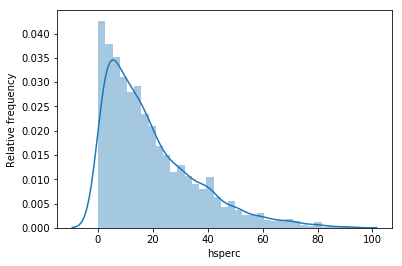

In [9]:
# Let's first have a look at what hsperc looks like
sns.distplot(collegeDataAll['hsperc'])
plt.ylabel("Relative frequency");


In [10]:
# Run the regression

model = smf.ols(formula = 'colgpa ~  sat + hsperc', data = collegeDataAll)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 colgpa   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.273
Method:                 Least Squares   F-statistic:                     777.9
Date:                Thu, 16 Jul 2020   Prob (F-statistic):          1.77e-287
Time:                        17:45:23   Log-Likelihood:                -3481.3
No. Observations:                4137   AIC:                             6969.
Df Residuals:                    4134   BIC:                             6988.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3918      0.072     19.454      0.0

### Interpretation

- What is the coefficient on HS percentile?

- What happened to the coefficient on SAT score once we introduced HS percentile? Why do you think that is?

**Research** : how many variables and which variables should I include in a regression? This is not an easy question at all! :)

Check out [this](https://towardsdatascience.com/data-science-simplified-part-5-multivariate-regression-models-7684b0489015) article to learn more!

## Data 2: Standing long jumps - exercise :)

Do taller people jump further in a standing long jump in general? Let's examine the data we collected.

In [11]:
## Data collected from you!

heights = np.array([64, 64, 67, 62, 62.5, 68, 73, 73, 63, 64, 69, 64, 60])

jump1 = np.array([132, 74, 60, 49, 52, 46, 40, 90, 71, 73, 67, 30, 41])

jump2 = np.array([130, 75, 60, 52, 50, 40.5, 43, 87, 68, 76, 65, 26, 50])

avg_jump = np.mean([jump1, jump2], axis=0)

# Let's put the data into a pandas dataframe to match what we did before
jump_df = pd.DataFrame({"height": heights, "jump1": jump1, "jump2": jump2, "avg_jump": avg_jump})
jump_df.head()

,height,jump1,jump2,avg_jump
0,64.0,132,130.0,131.0
1,64.0,74,75.0,74.5
2,67.0,60,60.0,60.0
3,62.0,49,52.0,50.5
4,62.5,52,50.0,51.0


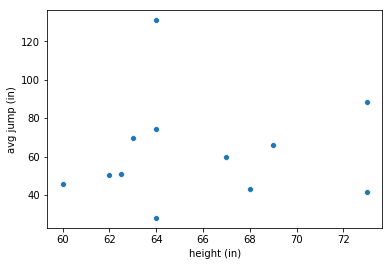

In [12]:
# Draw a scatterplot of the data

sns.scatterplot(heights,avg_jump)
plt.xlabel("height (in)")
plt.ylabel("avg jump (in)");

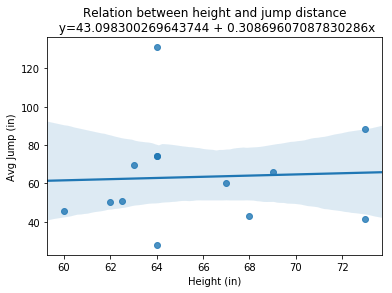

In [13]:
# Run a linear regression to test the relationship between average jump distance and height

model2 = smf.ols(formula = 'avg_jump ~ height', data = jump_df)
results2 = model2.fit()

sns.regplot(heights,avg_jump)
plt.xlabel("Height (in)")
plt.ylabel("Avg Jump (in)")
plt.title(f"Relation between height and jump distance\n y={results2.params[0]} + {results2.params[1]}x");

## The effect of outliers

Let's say now we also included Byron Jones' jump of 146.75 inches. Byron is 73 inches tall. How does that change our regression line?

Do you expect the slope to change or the y-intercept to change more?

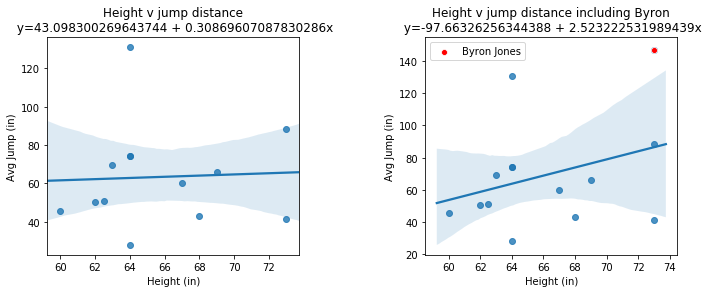

In [14]:
heights_byron = np.append(heights,73)
avg_jump_byron = np.append(avg_jump,146.73)
jump_df2 = pd.DataFrame({"height": heights_byron, "avg_jump": avg_jump_byron})

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.regplot(heights,avg_jump)
plt.xlabel("Height (in)")
plt.ylabel("Avg Jump (in)")
plt.title(f"Height v jump distance\n y={results2.params[0]} + {results2.params[1]}x")



# Redo linear regression
model3 = smf.ols(formula = 'avg_jump ~ height', data = jump_df2)
results3 = model3.fit()

plt.subplot(1,2,2)

sns.regplot(heights_byron,avg_jump_byron)
sns.scatterplot([73], [146.73], color ="red", label = "Byron Jones")
plt.xlabel("Height (in)")
plt.ylabel("Avg Jump (in)")
plt.title(f"Height v jump distance including Byron\n y={results3.params[0]} + {results3.params[1]}x")


plt.subplots_adjust(bottom=None, right=1, top=None, wspace=0.5, hspace = 0.4)

**Outliers** can greatly alter the estimates and even direction of your regression line. If you have outliers, first examine why they might be an outlier (is there some underlying biology that greatly changes their behavior?), and *consider* removing. Perhaps the most ethical option is to show the fit with the outlier, and then show the fit after removing the outlier.

--------

## Confidence bands and confidence in predictions

What is that blue shaded area around the regression line plotted by regplot that we have expertly ignored until now? This is the 95% confidence band. 

The **confidence band** measures the precision of the predicted mean Y for each value of X. 

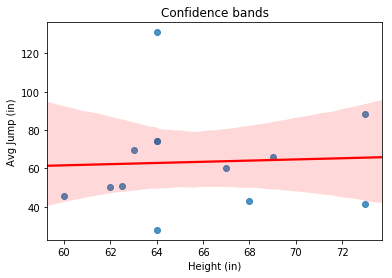

In [15]:
# The confidence band is shown in red in the following plot

sns.regplot(heights, avg_jump, line_kws={"color": "red"})
plt.xlabel("Height (in)")
plt.ylabel("Avg Jump (in)")
plt.title("Confidence bands");

Is this the same as predicting an individual new y-value? 

Let's say I make a standing long jump. How confident can you be in the prediction of *my jump distance*?

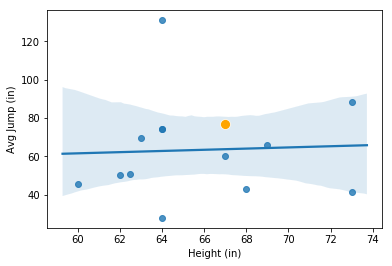

In [21]:
# Data from July 2020
drB_height = 67
drB_jump = 77

sns.regplot(heights, avg_jump)
sns.scatterplot([drB_height], [drB_jump], color = "orange", s=100)
plt.xlabel("Height (in)")
plt.ylabel("Avg Jump (in)");

The confidence band only describes precision in predicting the *mean* Y value for the given X value. Individuals have variation, so in order to capture the precision in estimating a new individual data point, we need the prediction intervals.

The **prediction interval** meaures the precision of the predicted single Y-values for each X. 


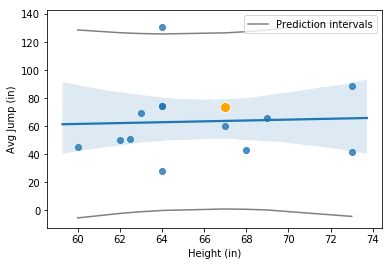

In [17]:
# Calculate and plot the prediction intervals
prstd, prediction_upper, prediction_lower = wls_prediction_std(results2)

sns.regplot(heights,avg_jump)
sns.lineplot(heights, prediction_upper, color = "gray")
sns.lineplot(heights, prediction_lower, color="gray", label="Prediction intervals")
sns.scatterplot([drB_height], [drB_jump], color = "orange", s=100)
plt.xlabel("Height (in)")
plt.ylabel("Avg Jump (in)");